<span style="color: #1f78b4; font-weight: bold">Set directory to notebooks folder</span>

In [2]:
import os
if(os.getcwd().split("\\")[-1] != "notebooks"):
    os.chdir("./notebooks")

In [20]:
import emogis

In [4]:
# specify the file directory, patient id, and trial number
file_dir = r'./data'
patient_id = '031318bf'
t = 10

### Format Conversion

`matToCSV()/trcToCSV()/c3dToCSV()`

In [5]:
# convert motion data mat file to csv
df = emogis.matToCSV(file_dir, patient_id, t, replace = True)
df.head()

File saved as 031318bf_10.csv 



frame#      time     RSlider                           Lslider              \
                             X          Y          Z           X           Y   
0      1  0.000000  966.502747  47.577183  70.174950  961.980408  654.870605   
1      2  0.006667  966.477661  47.558022  70.148300  961.997803  654.858093   
2      3  0.013333  966.492676  47.559666  70.157669  961.958191  654.868286   
3      4  0.020000  966.371277  47.567924  70.177666  962.016907  654.694519   
4      5  0.026667  966.166748  47.478252  70.031670  961.712524  654.555786   

                    Fix 2             ...     Rt.wrist  Lt.shoulder  \
           Z            X          Y  ...            Z            X   
0  70.448097  2489.673340 -20.339128  ...  1089.275879 -1207.091187   
1  70.480507  2489.677002 -20.293337  ...  1089.257324 -1207.047852   
2  70.453606  2489.685791 -20.319872  ...  1089.281982 -1206.983032   
3  70.523155  2489.492920 -20.458937  ...  1089.418579 -1207.164917   
4  70.393646  2489.140137 -20.662216  ...  1089.383911 -1207.227783   

                               Lt.elbow                              Lt.wrist  \
            Y            Z            X           Y            Z            X   
0  641.583801  1562.061157 -1161.945190  718.137512  1228.434814 -1001.446533   
1  641.725464  1562.059204 -1161.736572  718.200317  1228.377075 -1001.310181   
2  641.816589  1562.055908 -1161.533325  718.270630  1228.384033 -1001.186829   
3  642.383728  1562.457275 -1157.710327  714.618286  1225.843262 -1000.932617   
4  642.436340  1562.554932 -1157.396606  713.485779  1225.227295 -1000.822632   

                            
            Y            Z  
0  534.572144  1276.363037  
1  534.620667  1276.408936  
2  534.686279  1276.423584  
3  534.543457  1276.898682  
4  534.573486  1276.958984  

[5 rows x 92 columns]

### Feature Extraction

`motionToJointAngle()`

In [6]:
# convert motion data to joint angles
df_angle = emogis.motionToJointAngle(df)

Columns in CSV            Mapped Column
______________            _____________
Lt.heel                   Left heel
Rt.heel                   Right heel
Lt.toe                    Left toe
Rt.toe                    Right toe
Lt.knee                   Left knee
Rt.knee                   Right knee
Lt.ankle                  Left ankle
Rt.Ankle                  Right ankle
Lt.hip                    Left hip
Rt.hip                    Right hip
Lt.shoulder               Left shoulder
Rt.shoulder               Right shoulder


`plot()`

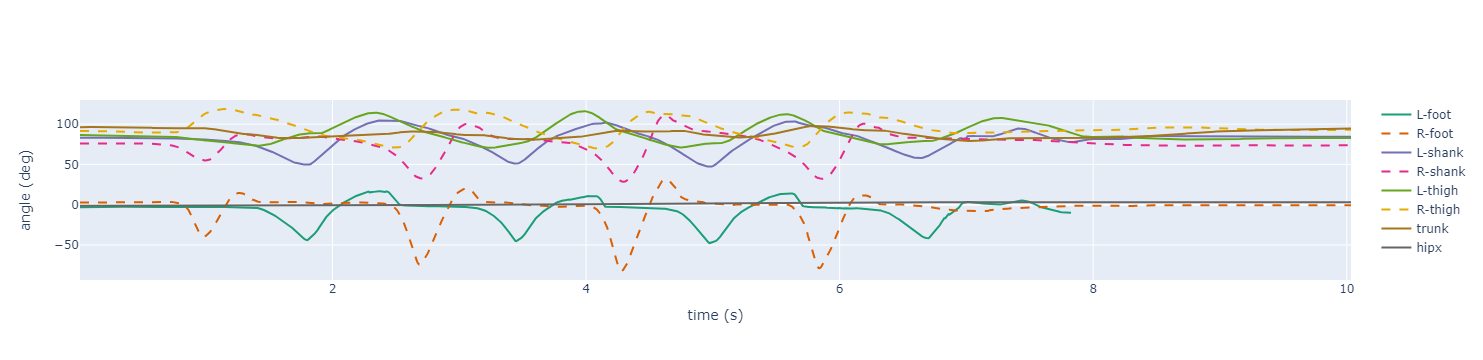

In [7]:
emogis.plot(df_angle, data_type = 'jnt')

`knn_impute()/mice_impute()/interpolate_impute()`

In [8]:
# impute missing values in the joint angle data
df_imputed = emogis.mice_impute(df_angle, data_type = 'jnt') # Alternatives: knn_impute, interpolate_impute

`plot()`

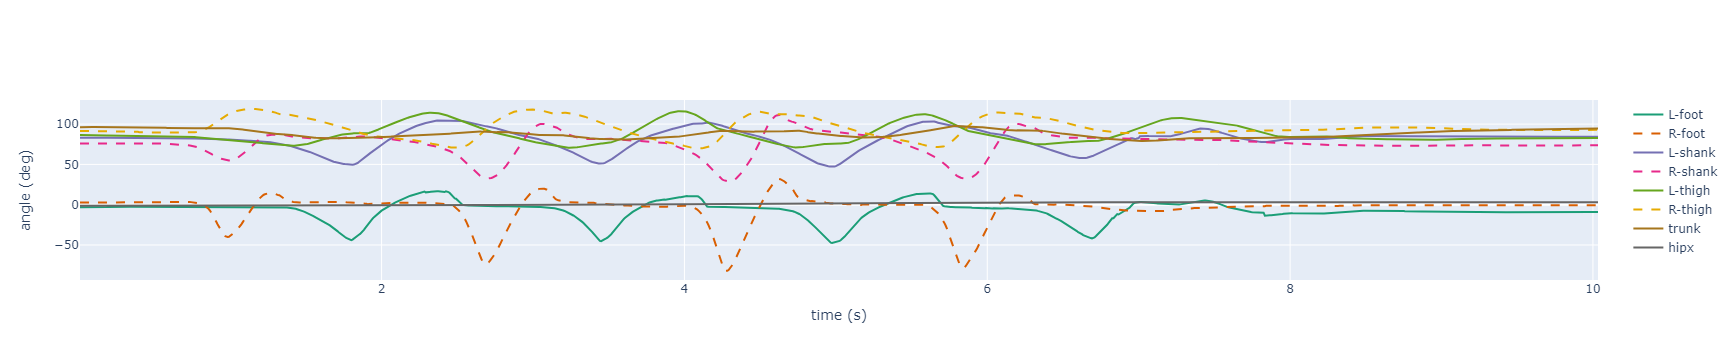

In [9]:
emogis.plot(df_imputed, data_type='jnt')

`filter_data()`

In [10]:
# filter noise in the joint angle data
df_filtered = emogis.filter_data(df_imputed, data_type = 'jnt')

`plot()`

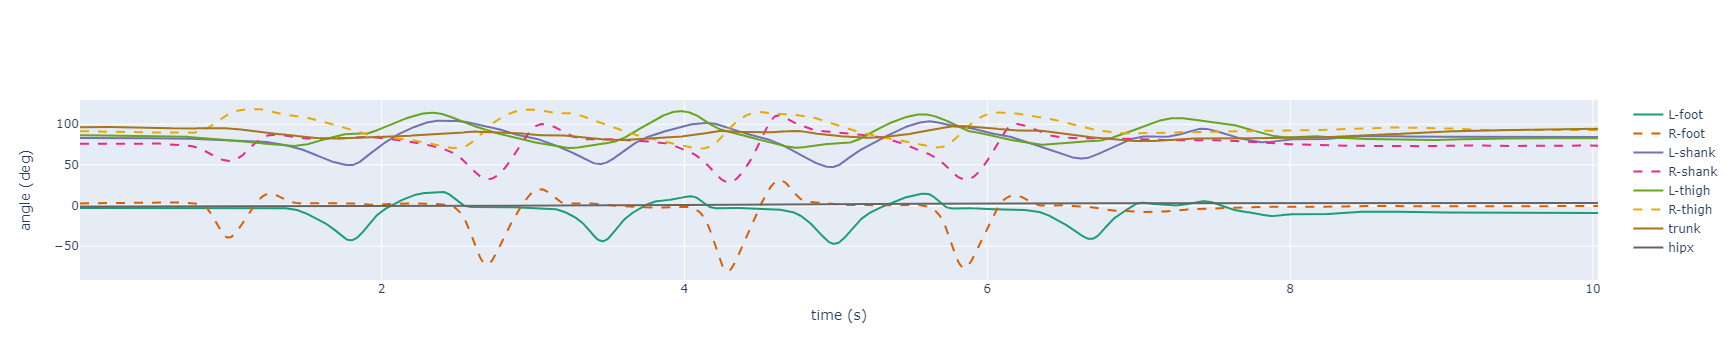

In [11]:
emogis.plot(df_filtered, data_type='jnt')

`save()`

In [12]:
# save the processed angle data to a csv file
emogis.save(df_filtered, file_dir, patient_id, trial = t, 
                data_type = 'jnt', replace = True)

File saved as 031318bf_10_jnt.csv 



`load_VA()`

In [13]:
# load the filtered angle data to VA system
emogis.load_VA(file_dir, patient_id, trial = t, data_type = 'jnt', group = 'retest')

File 031318bf_10_jnt.csv already exists. Do you want to overwrite (y/n)? 

File 031318bf_10_jnt.csv not overwritten in VA system 



`read()`

In [14]:
# read the ground reaction force data
df_grf = emogis.read(file_dir, patient_id, trial = t, data_type = 'grf')

`plot()`

In [15]:
emogis.plot(df_grf, data_type = 'grf')

`load_VA()`

In [16]:
# load the ground reaction force data to VA system
emogis.load_VA(file_dir, patient_id, trial = t, data_type = 'grf', group = 'retest')

File 031318bf_10_grf.csv already exists. Do you want to overwrite (y/n)? 

File 031318bf_10_grf.csv not overwritten in VA system 



`mark_step_times()`

In [17]:
# mark the step times using the plot of grf data and save in csv file

Left = [(2.46, 3.51), (4.10, 5.04)]
Right = [(3.12, 4.44), (4.69, 5.87)]
trialtype = 'Nat'

emogis.mark_step_times(file_dir, patient_id, t, Left, Right, trialtype)

Step time for trial already exists. Do you want to overwrite: ? (y/n)
Not overwriting


`read()`

In [18]:
# read the step time data
df_step = emogis.read(file_dir, patient_id, data_type = 'step_time')

In [19]:
df_step.head()

subject  trial trialtype  touch down  toe off footing  touch down.1  \
0  031318bf     10       Nat        2.46     3.51       L          3.12   
1  031318bf     11       Nat        2.55     3.61       L          3.27   

   toe off.1 footing.1  touch down.2  toe off.2 footing.2  touch down.3  \
0      4.440         R          4.10       5.04         L          4.69   
1      4.585         R          4.37       5.40         L          5.04   

   toe off.3 footing.3  
0       5.87         R  
1       6.88         R

`plot()`

In [20]:
# plot the ground reaction force data with step times
emogis.plot(df_grf, step_data = df_step, trial = t,
                data_type = 'grf', steps = True)

`load_VA()`

In [21]:
# load the step time data to VA system
emogis.load_VA(file_dir, patient_id, data_type = 'step_time', group = 'Stroke')

File 031318bfstep.csv loaded in VA system under group retest 



`get_sptmp_params()`

In [25]:
# extract the spatiotemporal parameters using step time and joint angle data
df_sptmp = emogis.get_sptmp_params(file_dir, patient_id)
df_sptmp

sid  trial  RstepLength  LstepLength  timeRswing  timeLswing  \
0  031318bf     10     0.498881     0.596796       1.320        1.05   
1  031318bf     11     0.441331     0.588753       1.315        1.06   

   timeRgait  timeLgait  GaitSpeed  
0       1.57       1.64   0.792712  
1       1.77       1.82   0.700844

`save()`

In [23]:
# save the spatiotemporal parameters in csv file
emogis.save(df_sptmp, file_dir, patient_id, data_type = 'sptmp_params', replace = True)

File saved as 031318bfsptmp.csv 



`normalize_data()`

In [42]:
# normalize the ground reaction force data using step time data
df_norm = emogis.normalize_data(df_grf, df_step, patient_id, t, data_type = 'grf', cycle='L')
df_norm.head()

time      R-AP       L-AP      R-ML      L-ML      R-VT        L-VT
0  0.000000  0.064300  -2.224600 -0.001900 -0.302600  0.037100   -3.043000
1  1.010101  0.183770   7.347212  0.114564  1.098855  0.023876    9.555221
2  2.020202  0.237115  21.599206  0.351033  2.755503  0.024558   38.844797
3  3.030303  0.194355  22.169218  0.476836  2.189573 -0.001555   70.354091
4  4.040404  0.093921   6.876921  0.477218  0.271573  0.045594  103.054661

`plot()`

In [36]:
emogis.plot(df_norm, data_type = 'grf', cycle = 'L')

`save()`

In [39]:
emogis.save(df_norm, file_dir, patient_id, trial = t, 
                data_type = 'grf', norm=True)

File saved as 031318bf_10_grf_cyc_L.csv 



In [ ]:
# check bf before and after 6 month trials [L limb, L Cycle]. All data. But then show spread and mean option.
# Plus step length (L, R), Gait time (L, R) + gait speed
# Show filtering. 3 ways. How to delete filters
# Show toggling of legends.
# Show single group exploration.